In [22]:
#install.packages("rio")

In [2]:
library(rio)
library(ggplot2)

In [3]:
info<-import("/home/naina/Downloads/NHLTop100.xlsx")

In [4]:
head(info)

Rank,Player,Team,Pos,1st NHL Season,Last NHL Season,GP,G,A,P,+/-,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,NA,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,NA,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,NA,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,NA,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,NA,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,NA,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602


<b><h1>The default linear model</h1> </b>


Call:
lm(formula = A ~ G, data = info)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
G             0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


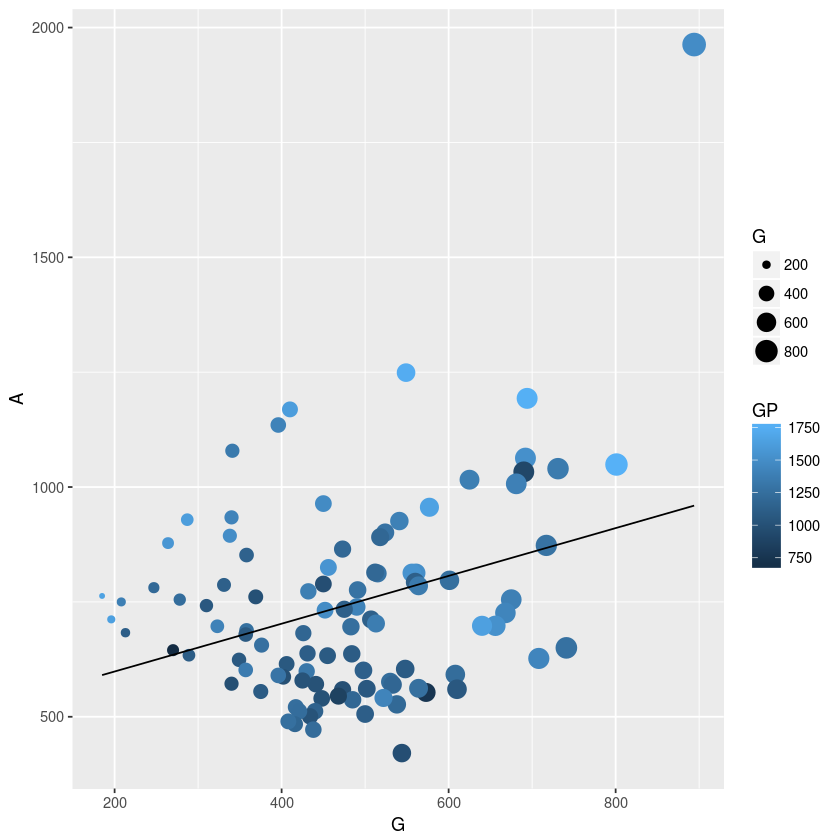

In [48]:
linear_model <- lm(A~G, info)
linex <- predict(linear_model)
ggplot(info, aes(x=G, y=A)) + geom_point(aes( size = G, color = GP)) + geom_line(aes(y = linex))
summary(linear_model)

<b><h1>Fitting the line using Wayne Gretzky</h1></b>


Call:
lm(formula = I(A - 1960) ~ I(G - 893), data = info)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1000.9423    66.3030 -15.096  < 2e-16 ***
I(G - 893)      0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


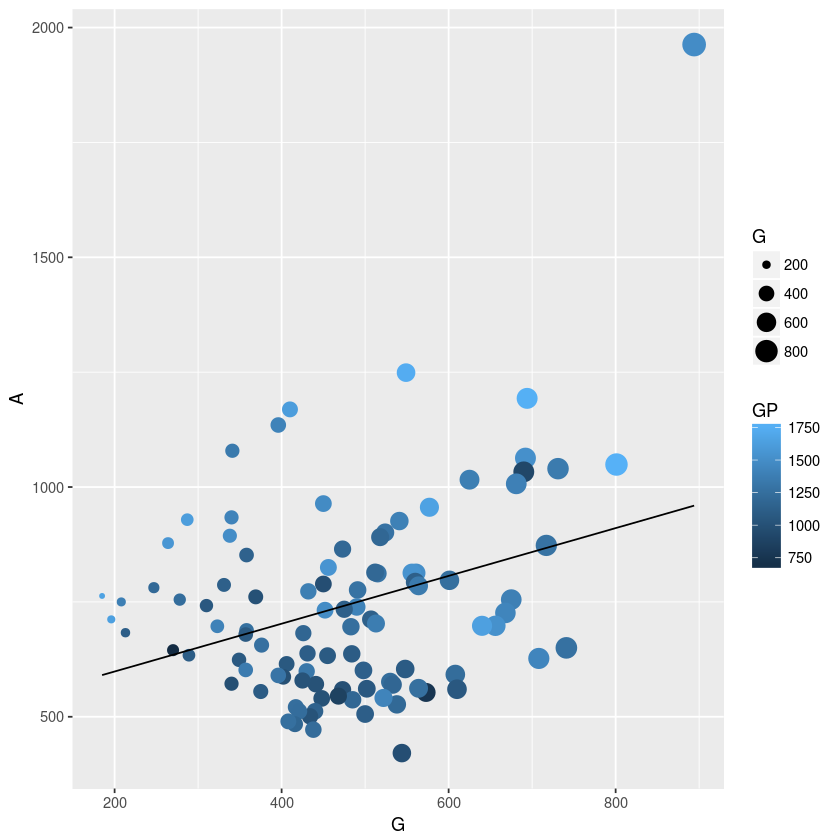

In [49]:
linear_model2 <- lm(I(A-1960)~I(G-893), info)
cf <- coef(linear_model2)
line_ <- predict(lm(I(A-cf[1])~I(G), info))
ggplot(info, aes(x=G, y=A)) + 
    geom_point(aes( size = G, color = GP)) + geom_line(aes(y = linex))
summary(linear_model2)

<b><h1>Adding data for Patrick Kane and Fitting the line </h1></b>

In [24]:
new <- data.frame(NA,"Patrick Kane",NA,NA,NA,NA,733,284,460,744,77,284,336,1,49,NA,3,2286)
names(new) <- names(info)
new <- rbind(info,new)


Call:
lm(formula = I(A - 460) ~ I(G - 284), data = new)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.97 -175.12   -8.91  126.24  997.66 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 177.0386    34.9740   5.062 1.92e-06 ***
I(G - 284)    0.5382     0.1492   3.607 0.000488 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.8 on 99 degrees of freedom
Multiple R-squared:  0.1161,	Adjusted R-squared:  0.1072 
F-statistic: 13.01 on 1 and 99 DF,  p-value: 0.000488


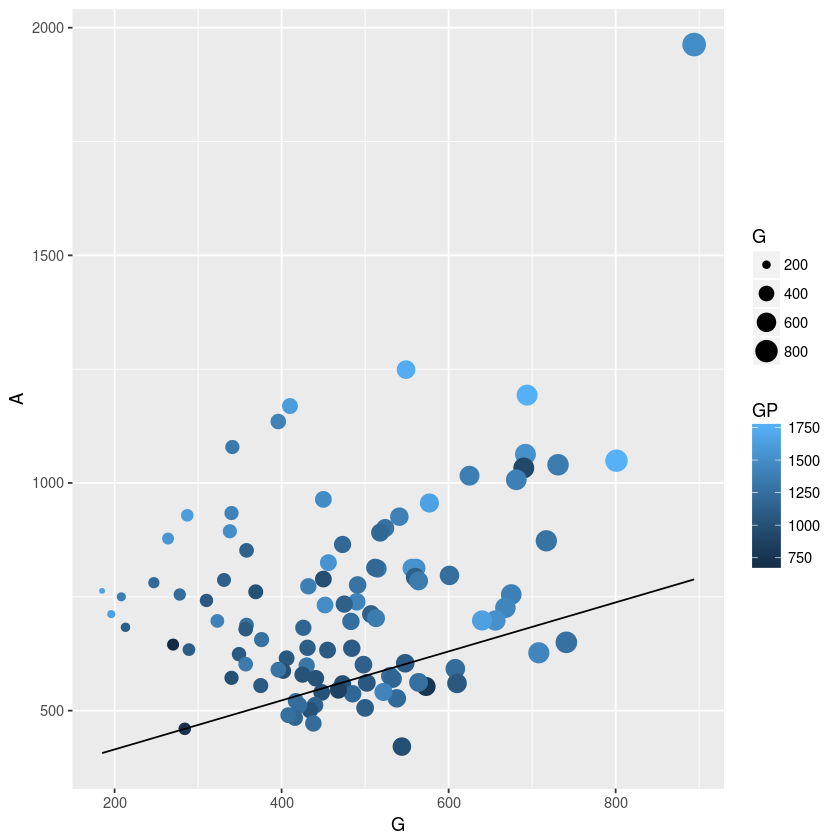

In [50]:
linear_model3 <- lm(I(A-460)~I(G-284), new)
cf <- coef(linear_model3)
linex <- predict(lm(I(A-cf[1])~I(G), new))
ggplot(new, aes(x=G, y=A)) + 
    geom_point(aes( size = G, color = GP)) + geom_line(aes(y = linex))
   
summary(linear_model3)

<b><h1>Fitting the line through WAYNE GRETZKY and (0,0)</h1><b>


Call:
lm(formula = I(A - 1963) ~ I(G - 894) + 0, data = info)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 894)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16


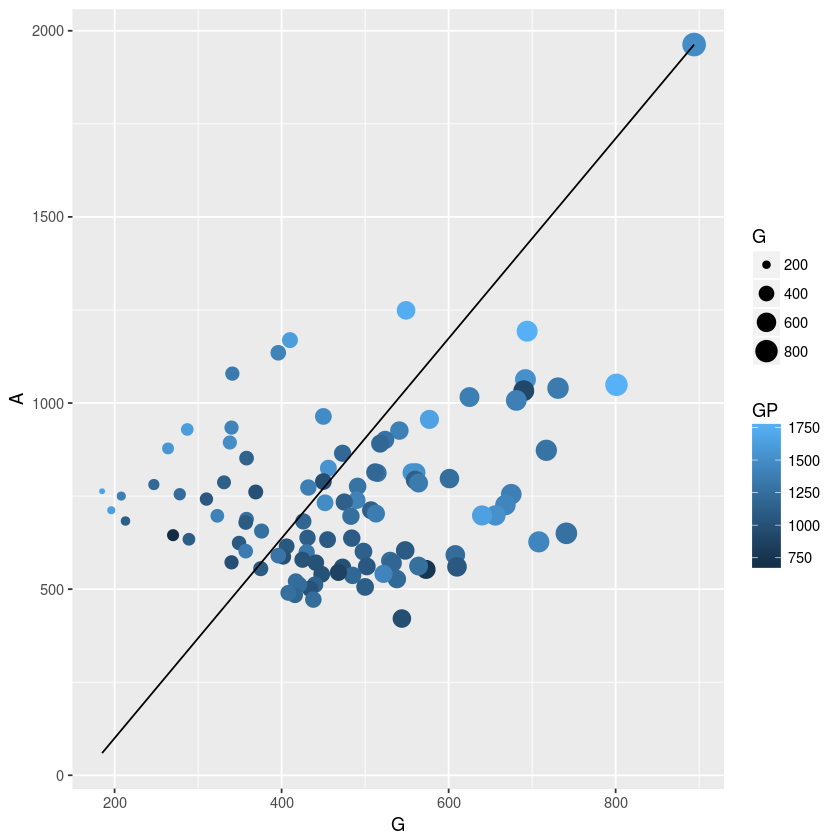

In [51]:
linear_model4 <- lm(I(A-1963) ~ I(G-894) + 0, info)
linex <- predict(linear_model4) + 1963 
ggplot(info, aes(x=G, y=A)) + 
    geom_point(aes( size = G, color = GP)) + geom_line(aes(y = linex))  
    
summary(linear_model4)

<b><h1>Fitting the line for PATRICK KANE and through (0,0)</h1></b>


Call:
lm(formula = I(A - 460) ~ I(G - 284) + 0, data = new)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.74 -112.48   40.47  168.26  802.11 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 284)    1.149      0.098   11.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 230.8 on 100 degrees of freedom
Multiple R-squared:  0.5789,	Adjusted R-squared:  0.5747 
F-statistic: 137.5 on 1 and 100 DF,  p-value: < 2.2e-16


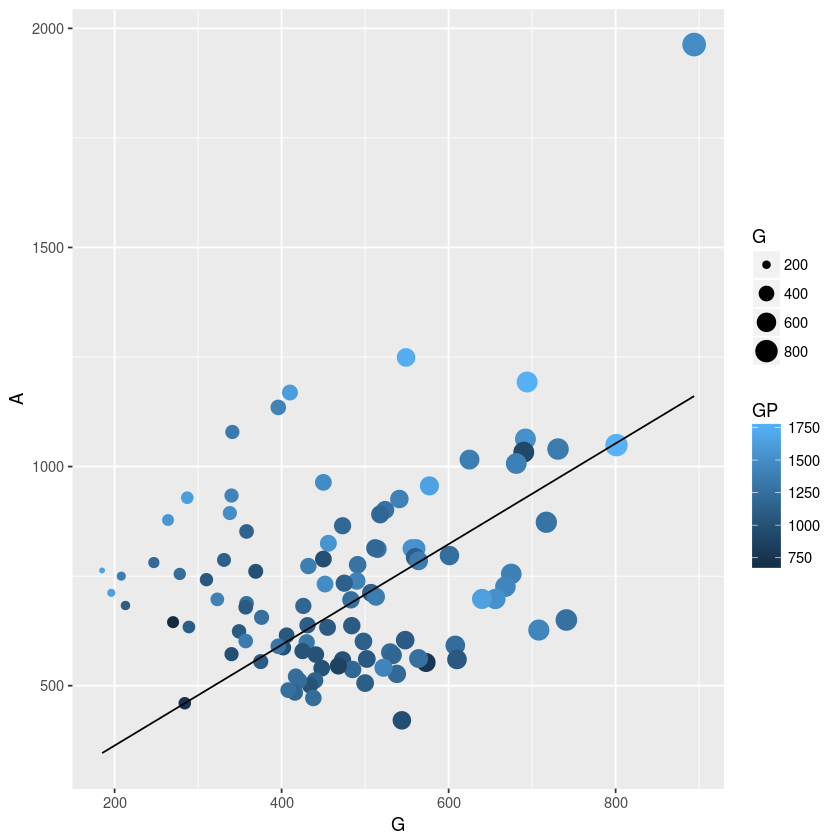

In [52]:
linear_model5 <- lm(I(A-460) ~ I(G-284) + 0, new)
linex <- predict(linear_model5)+460
ggplot(new, aes(x=G, y=A)) + geom_point(aes( size = G, color = GP)) + geom_line(aes(y = linex)) 
summary(linear_model5)

<b><h1>Fitting through (0,0)</h1></b>


Call:
lm(formula = A ~ G + 0, data = info)

Residuals:
    Min      1Q  Median      3Q     Max 
-446.93 -137.40    1.88  159.73  639.58 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
G  1.48033    0.05009   29.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 247.9 on 99 degrees of freedom
Multiple R-squared:  0.8982,	Adjusted R-squared:  0.8972 
F-statistic: 873.4 on 1 and 99 DF,  p-value: < 2.2e-16


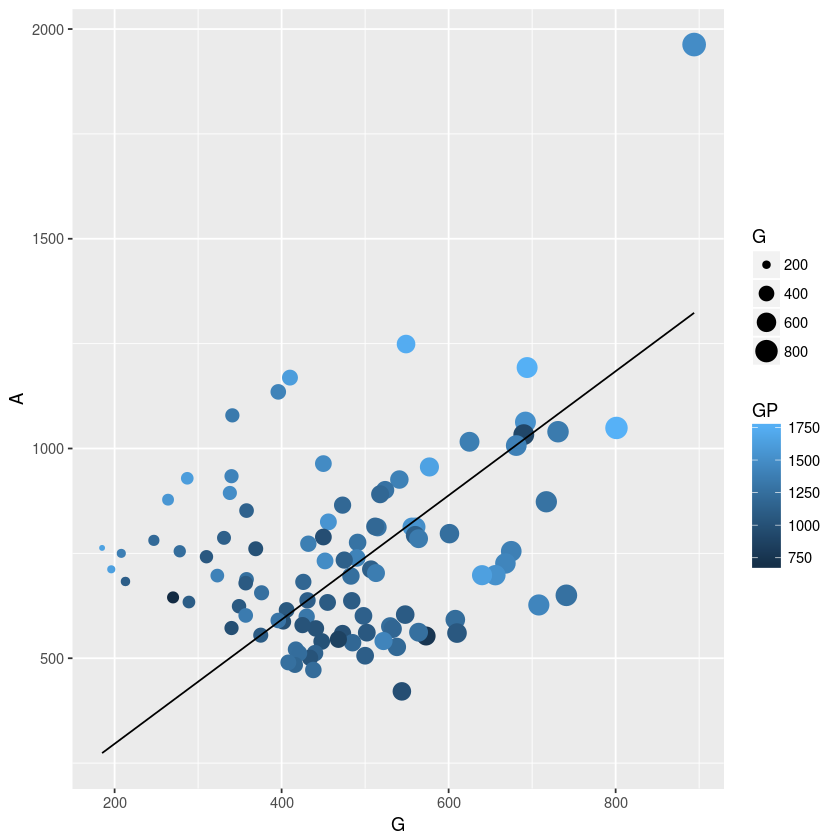

In [53]:
linear_model6 <- lm(A ~ G +0, info)
linex <- predict(linear_model6)
summary(linear_model6)
ggplot(info, aes(x=G, y=A)) + geom_point(aes( size = G, color = GP)) + geom_line(aes(y = linex))

<b><h1>Interpretation of above results </h1></b>

In [47]:
r2 <- c(0.1082,0.1082,0.1161,0.9091,0.5789,0.8982)
p <- c("0.0008317","0.0008317","0.000488","< 2.2e-16", "< 2.2e-16", "< 2.2e-16")
model <- c("Default Model","Line Through Wayne Gretzky","Line Through Patrick Kane","Line Through Wayne Gretzky and origin","Line Through Patrick Kane and origin","Line Through Origin")
interpreted_results <- data.frame(model,r2,p)
interpreted_results

model,r2,p
Default Model,0.1082,0.0008317
Line Through Wayne Gretzky,0.1082,0.0008317
Line Through Patrick Kane,0.1161,0.000488
Line Through Wayne Gretzky and origin,0.9091,< 2.2e-16
Line Through Patrick Kane and origin,0.5789,< 2.2e-16
Line Through Origin,0.8982,< 2.2e-16
